In [0]:
# Import necessary libraries
import pandas as pd
from pyspark.sql import SparkSession
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# Create a Spark session
spark = SparkSession.builder \
    .appName("NYC Parking Violations Clustering") \
    .getOrCreate()


In [0]:
# Read the data
data_path = "/FileStore/shared_uploads/randiesinclair@gmail.com/pk_violations_new0317.csv"
data = spark.read.csv(data_path, header=True, inferSchema=True)

# Convert to Pandas DataFrame
data_pd = data.toPandas()
data_pd.head()


,Unnamed: 0,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Violation Precinct,Issuer Code,Violation Time,Violation County,Street Name,Sub Division,Vehicle Color,Vehicle Year
0,65,NY,PAS,2022-06-14,74,SUBN,NISSA,P,76,972580,0841P,K,COURT STREET,F2,BROWN,2011
1,10,PA,PAS,2022-06-05,10,SUBN,NISSA,P,6,161134,0225P,NY,WASHINGTON SQUARE SO,B,GRAY,0
2,23,NY,PAS,2022-07-04,68,SDN,CHEVR,N,122,160690,0626P,R,CEDAR GROVE BEACH,F3,SILVER,2015
3,91,NY,PAS,2022-07-09,98,SUBN,HONDA,P,112,952268,1238A,Q,102 STREET,C3,GRAY,2006
4,98,NY,PAS,2022-06-25,98,SUBN,TOYOT,P,72,971279,0812P,K,16TH STREET,E2,GRAY,2015


In [0]:
# Take a 1% sample from the dataset
data_sample = data_pd.sample(frac=0.01, random_state=42)

# Select the relevant features
selected_columns = ['Vehicle Make', 'Vehicle Color', 'Registration State', 'Vehicle Body Type', 'Street Name']
data_sample = data_sample[selected_columns]


In [0]:
# Encode categorical features
encoders = {column: LabelEncoder().fit(data_sample[column]) for column in selected_columns}
data_encoded = pd.DataFrame({column: encoders[column].transform(data_sample[column]) for column in selected_columns})

# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)


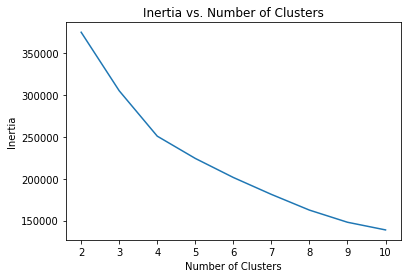

In [0]:
# Find the optimal number of clusters using inertia
inertias = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Plot the inertia
plt.plot(cluster_range, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.show()


In [0]:
# Train the K-Means model with the optimal number of clusters
optimal_clusters = cluster_range[inertias.index(min(inertias))]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled)

# Assign the cluster labels to the data
data_sample['Cluster'] = kmeans.labels_


Out[8]: <module 'matplotlib.pyplot' from '/databricks/python/lib/python3.8/site-packages/matplotlib/pyplot.py'>

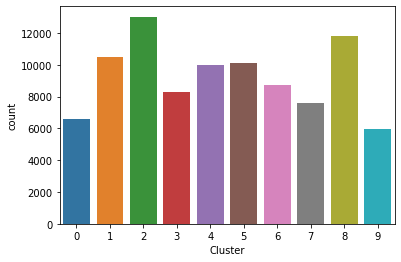

In [0]:
# Plot the cluster sizes
sns.countplot(data=data_sample, x='Cluster')
plt
